# Homework 1 - Machine Learning
### ist1103000, Pedro Lima     ; ist1103179, Diogo Costa (Group 029)

#### II. Programming
### 1)

In [2]:
import pandas as pd
from scipy.io.arff import loadarff

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
from sklearn.feature_selection import f_classif

input_vars = df.drop("class", axis=1)
output_vars = df["class"]

fimportance = f_classif(input_vars, output_vars)

print('features', input_vars.columns.values)
print('scores', fimportance[0])
print('pvalues', fimportance[1])

features ['pelvic_incidence' 'pelvic_tilt' 'lumbar_lordosis_angle' 'sacral_slope'
 'pelvic_radius' 'degree_spondylolisthesis']
scores [ 98.53970917  21.29919433 114.98284047  89.6439533   16.86693476
 119.12288061]
pvalues [8.75284896e-34 2.17687915e-09 5.35732939e-38 2.17567036e-31
 1.12199590e-07 5.11473208e-39]


#### Highest discriminative power: degree_spondylolisthesis
#### Lowest discriminative power: pelvic_radius

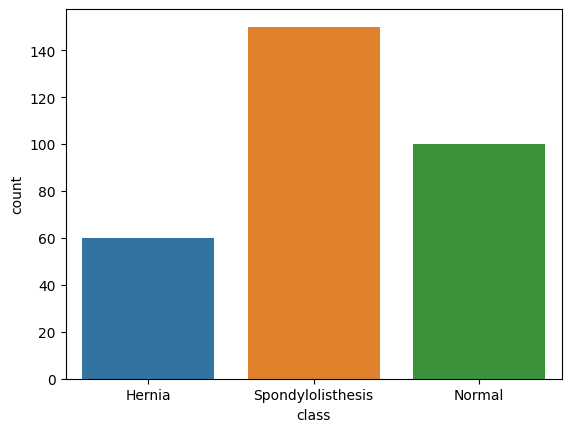

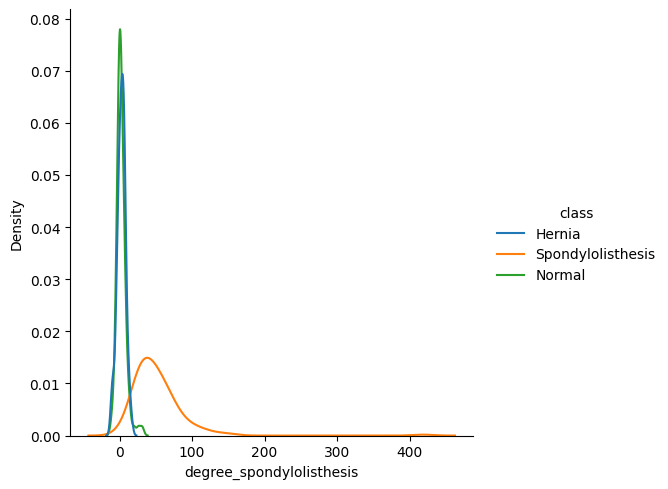

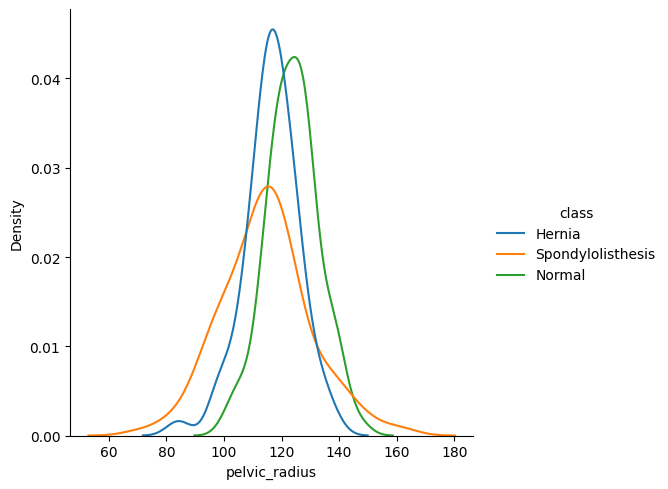

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.show()

sns.displot(df, x="degree_spondylolisthesis", hue="class", kind="kde", common_norm=False)

sns.displot(df, x="pelvic_radius", hue="class", kind="kde", common_norm=False)

### 2)

In [5]:
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_vars, output_vars, train_size=0.7, stratify=output_vars, random_state=0)
print("#training obs =",len(X_train),"\n#testing obs =",len(X_test))

depth_limits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]      # tree depths
accuracies_test = []                                # list of accuracies of the test set for each tree depth
accuracies_train = []                               # list of accuracies of the training set for each tree depth

for depth in depth_limits:      # makes a decsion tree for every depth from 1 to 10
    test_sum, train_sum = 0, 0
    for _ in range(10):
        predictor = tree.DecisionTreeClassifier(max_depth=depth)
        predictor.fit(X_train, y_train)

        y_pred_test = predictor.predict(X_test)
        y_pred_train = predictor.predict(X_train)
        test_sum += round(metrics.accuracy_score(y_test, y_pred_test),2)
        train_sum += round(metrics.accuracy_score(y_train, y_pred_train),2)
    
    accuracies_test.append(test_sum/10)
    accuracies_train.append(train_sum/10)


#training obs = 217 
#testing obs = 93


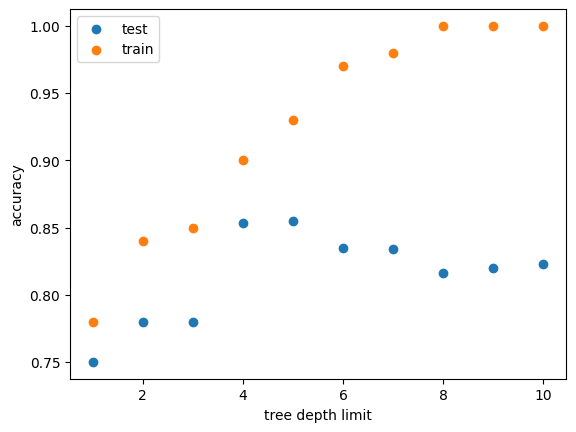

In [9]:
plt.scatter(depth_limits, accuracies_test, label='test')
plt.scatter(depth_limits, accuracies_train, label='train')
plt.xlabel("tree depth limit")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### 3)

Considering the previous plot, we can assess that the deeper the tree reaches, the more accurate the classifications become as far as the accuracy of the training set is concerned. But in terms of the accuracy of the test set, the association between tree depth and accuracy is noticeably weaker, probably due to overfitting when the tree goes too deep, and we therefore observe that the results tend to be the most accurate around a maximum depth of 5. For that reason, the classification seems to have a better generalization capacity around that depth.

### 4)
#### i)

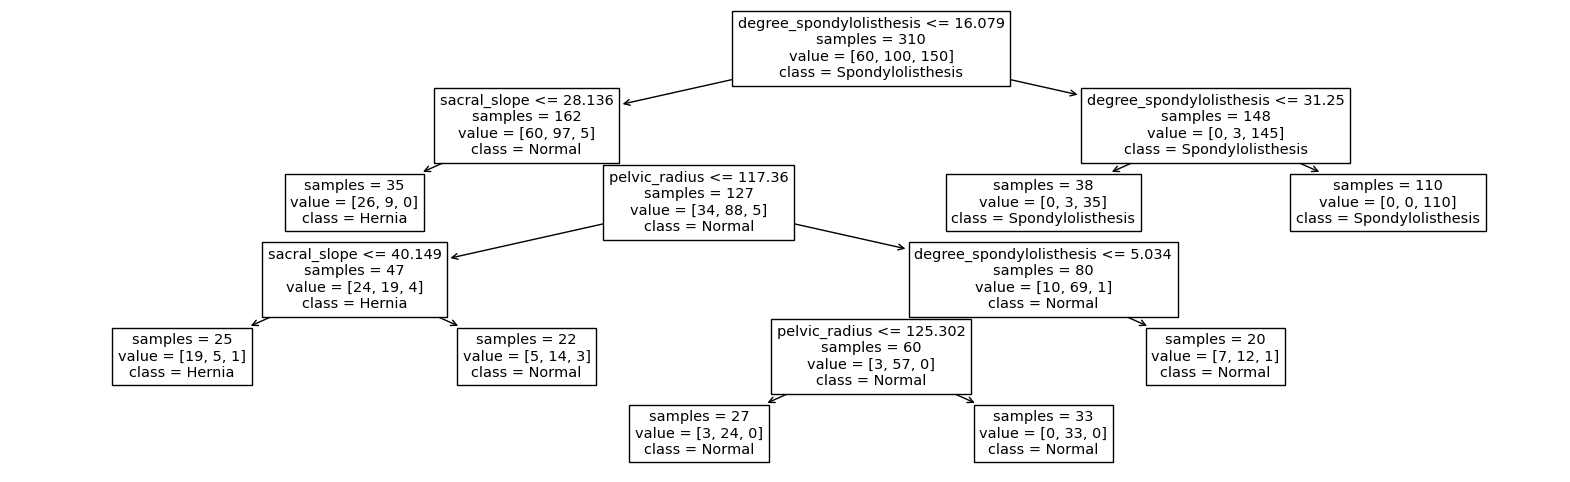

In [11]:
new_predictor = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
new_predictor.fit(input_vars, output_vars)

figure = plt.figure(figsize=(20, 6))
tree.plot_tree(new_predictor, feature_names=list(input_vars.columns.values), class_names=["Hernia", "Normal", "Spondylolisthesis"], impurity=False)
plt.show()


## ii)

A hernia condition may be attributed if the following conditional associations are met:
-	degree_spondylolisthesis ≤ 16.079, sacral_slope ≤ 28.136
-	degree_spondylolisthesis ≤ 16.079, sacral_slope > 28.136, pelvic_radius ≤ 117.36,  sacral_slope ≤ 40.149
